In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import RandomOverSampler

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ros = RandomOverSampler(random_state=0)

In [4]:
res.resample_directory(ros, path, 'ROS', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ROS/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

# Generate Dataset from image data

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ROS/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7750 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s=19)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 20)

Epoch 1/20
163/163 [==============================] - 17s 106ms/step - loss: 0.3983 - tp: 4143.0000 - fp: 942.0000 - tn: 4248.0000 - fn: 1047.0000 - accuracy: 0.8084 - precision: 0.8147 - recall: 0.7983 - auc: 0.9005 - val_loss: 0.2461 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9805
Epoch 2/20
163/163 [==============================] - 16s 98ms/step - loss: 0.2402 - tp: 4715.0000 - fp: 508.0000 - tn: 4708.0000 - fn: 501.0000 - accuracy: 0.9033 - precision: 0.9027 - recall: 0.9039 - auc: 0.9648 - val_loss: 0.4249 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8828
Epoch 3/20
163/163 [==============================] - 15s 94ms/step - loss: 0.2229 - tp: 4724.0000 - fp: 463.0000 - tn: 4727.0000 - fn: 466.0000 - accuracy: 0.9105 - precision: 0.9107 - recall: 0.9102 - auc: 0.

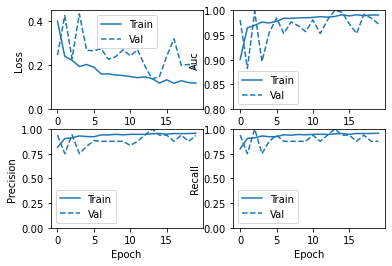

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.86      0.83      0.84       234
   PNEUMONIA       0.90      0.92      0.91       390

    accuracy                           0.88       624
   macro avg       0.88      0.87      0.88       624
weighted avg       0.88      0.88      0.88       624



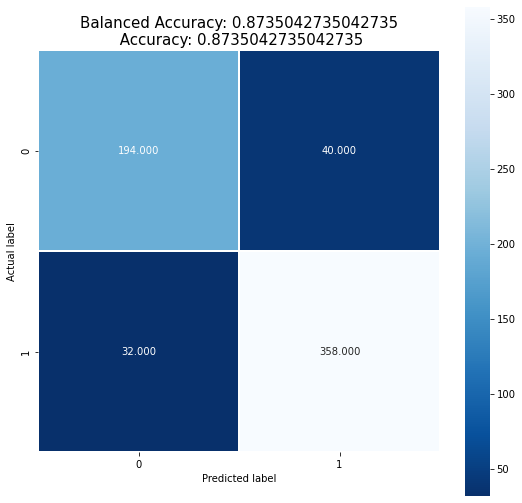

In [13]:
cnn.display_confusion_matrix(test_set)